### 1.1 Install Dependencies and Setup

In [2]:
!pip install labelme tensorflow opencv-python matplotlib albumentations

In [3]:
pip install albumentations


Note: you may need to restart the kernel to use updated packages.


In [37]:
pip install package_name --user


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for package_name: filename=package_name-0.1-py3-none-any.whl size=1235 sha256=2a0d76222c1fcde79ebf261b86d0e477392501b151c2d27ab3ac6b15114059a2
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\a3\36\c4\98d928f30290fb88555f848f73093f02b67c984a45c56c3e97
Successfully built package_name
Note: you may need to restart the kernel to use updated packages.


In [10]:
!pip install --upgrade pip

     ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
     -- ------------------------------------- 0.1/2.1 MB 6.4 MB/s eta 0:00:01
     --------- ------------------------------ 0.5/2.1 MB 6.2 MB/s eta 0:00:01
     -------------------- ------------------- 1.1/2.1 MB 8.7 MB/s eta 0:00:01
     ------------------------------- -------- 1.7/2.1 MB 9.6 MB/s eta 0:00:01
     ---------------------------------------  2.1/2.1 MB 9.4 MB/s eta 0:00:01
     ---------------------------------------  2.1/2.1 MB 8.9 MB/s eta 0:00:01
     ---------------------------------------- 2.1/2.1 MB 7.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### 1.2 Collect Images Using OpenCV

In [4]:
import os
import time
import uuid
import cv2

In [3]:
IMAGES_PATH = os.path.join('data','images')
number_images = 30

In [7]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [2]:
pip install labelme

In [5]:
pip install labelme

### 1.3 Annotate Images with LabelMe

In [4]:
conda create --name=labelme python=3
conda activate labelme
pip install labelme


SyntaxError: invalid syntax (487587012.py, line 1)

In [5]:
!labelme


2024-04-11 11:08:16,439 [INFO   ] __init__:get_config:67- Loading config file from: C:\Users\hp\.labelmerc


In [2]:
!pip install PyQt5


   ---------------------------------------- 0.0/6.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/6.8 MB 1.7 MB/s eta 0:00:05
   ---------------------------------------- 0.1/6.8 MB 1.7 MB/s eta 0:00:05
   - -------------------------------------- 0.2/6.8 MB 1.3 MB/s eta 0:00:06
   -- ------------------------------------- 0.4/6.8 MB 2.1 MB/s eta 0:00:04
   --- ------------------------------------ 0.6/6.8 MB 2.5 MB/s eta 0:00:03
   ---- ----------------------------------- 0.8/6.8 MB 3.1 MB/s eta 0:00:02
   ------- -------------------------------- 1.2/6.8 MB 3.9 MB/s eta 0:00:02
   -------- ------------------------------- 1.5/6.8 MB 4.0 MB/s eta 0:00:02
   --------- ------------------------------ 1.6/6.8 MB 4.0 MB/s eta 0:00:02
   ----------- ---------------------------- 2.0/6.8 MB 4.4 MB/s eta 0:00:02
   ------------- -------------------------- 2.3/6.8 MB 4.6 MB/s eta 0:00:01
   -------------- ------------------------- 2.5/6.8 MB 4.5 MB/s eta 0:00:01
   --------------- 

In [10]:
!pip install tensorflow


In [5]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

In [27]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [13]:
tf.config.list_physical_devices('GPU')

[]

In [14]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg')

In [15]:
images.as_numpy_iterator().next()

b'data\\images\\a9beb504-f55c-11ee-b4dc-e687b9fd463f.jpg'

In [21]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [17]:
images = images.map(load_image)

In [18]:
images.as_numpy_iterator().next()

array([[[157, 159, 120],
        [156, 158, 121],
        [159, 160, 126],
        ...,
        [153, 124, 129],
        [146, 120, 131],
        [137, 113, 126]],

       [[159, 161, 122],
        [156, 160, 123],
        [159, 160, 126],
        ...,
        [149, 120, 124],
        [146, 119, 128],
        [139, 116, 126]],

       [[159, 163, 126],
        [158, 164, 126],
        [157, 161, 126],
        ...,
        [143, 113, 115],
        [143, 114, 119],
        [140, 115, 121]],

       ...,

       [[208, 252, 253],
        [207, 251, 252],
        [210, 251, 253],
        ...,
        [163, 148, 151],
        [167, 152, 155],
        [168, 153, 156]],

       [[206, 247, 249],
        [207, 248, 250],
        [209, 249, 251],
        ...,
        [162, 145, 151],
        [168, 149, 155],
        [170, 151, 157]],

       [[212, 252, 254],
        [209, 249, 251],
        [208, 248, 250],
        ...,
        [160, 143, 149],
        [166, 145, 152],
        [167, 146, 153]]

In [19]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

In [26]:
image_generator = images.batch(4).as_numpy_iterator()
plot_images = image_generator.next()

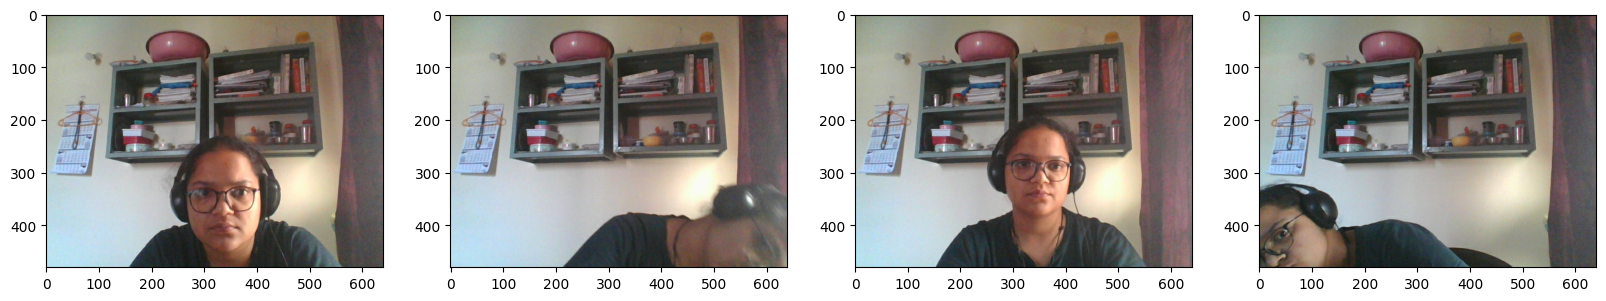

In [27]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

In [32]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)  

In [9]:
import albumentations as alb

In [10]:
augmentor = alb.Compose(
    [
        alb.RandomCrop(width=450, height=450),
        alb.HorizontalFlip(p=0.5),
        alb.RandomBrightnessContrast(p=0.2),
        alb.RandomGamma(p=0.2),
        alb.RGBShift(p=0.2),
        alb.VerticalFlip(p=0.5),
    ],
    bbox_params=alb.BboxParams(format="albumentations", label_fields=["class_labels"]),
)

In [11]:
img = cv2.imread(os.path.join('data','train', 'images','9a5ba8f0-f55c-11ee-a9ac-e687b9fd463f.jpg'))

In [12]:
with open(os.path.join('data', 'train', 'labels', '9a5ba8f0-f55c-11ee-a9ac-e687b9fd463f.json'), 'r') as f:
    label = json.load(f)

In [13]:
label['shapes'][0]['points']

[[174.5197740112994, 247.6271186440678],
 [324.2372881355932, 402.99435028248587]]

In [14]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [15]:
coords = list(np.divide(coords, [640,480,640,480]))

In [16]:
coords

[0.27268714689265533,
 0.5158898305084746,
 0.5066207627118644,
 0.8395715630885122]

In [17]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [18]:
augmented['bboxes'][0][2:]
augmented['bboxes']

[(0.025599497802887564,
  0.12001255492780916,
  0.35830508474576267,
  0.4652730696798494)]

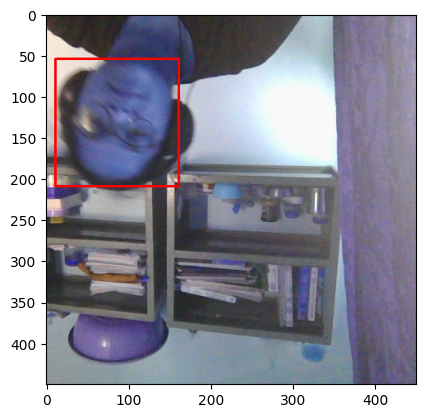

In [19]:
cv2.rectangle(
    augmented["image"],
    tuple(np.multiply(augmented["bboxes"][0][:2], [450, 450]).astype(int)),
    tuple(np.multiply(augmented["bboxes"][0][2:], [450, 450]).astype(int)),
    (255, 0, 0),
    2,
)

plt.imshow(augmented["image"])

In [20]:
for partition in ["train", "test", "val"]:
    for image in os.listdir(os.path.join("data", partition, "images")):
        img = cv2.imread(os.path.join("data", partition, "images", image))

        coords = [0, 0, 0.00001, 0.00001]
        label_path = os.path.join(
            "data", partition, "labels", f'{image.split(".")[0]}.json'
        )
        if os.path.exists(label_path):
            with open(label_path, "r") as f:
                label = json.load(f)

            coords[0] = label["shapes"][0]["points"][0][0]
            coords[1] = label["shapes"][0]["points"][0][1]
            coords[2] = label["shapes"][0]["points"][1][0]
            coords[3] = label["shapes"][0]["points"][1][1]
            coords = list(np.divide(coords, [640, 480, 640, 480]))

        try:
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=["face"])
                cv2.imwrite(
                    os.path.join(
                        "aug_data",
                        partition,
                        "images",
                        f'{image.split(".")[0]}.{x}.jpg',
                    ),
                    augmented["image"],
                )

                annotation = {}
                annotation["image"] = image

                if os.path.exists(label_path):
                    if len(augmented["bboxes"]) == 0:
                        annotation["bbox"] = [0, 0, 0, 0]
                        annotation["class"] = 0
                    else:
                        annotation["bbox"] = augmented["bboxes"][0]
                        annotation["class"] = 1
                else:
                    annotation["bbox"] = [0, 0, 0, 0]
                    annotation["class"] = 0

                with open(
                    os.path.join(
                        "aug_data",
                        partition,
                        "labels",
                        f'{image.split(".")[0]}.{x}.json',
                    ),
                    "w",
                ) as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

KeyboardInterrupt: 

In [22]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [23]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [24]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [25]:
train_images.as_numpy_iterator().next()

array([[[0.6127451 , 0.6852941 , 0.70686275],
        [0.6137255 , 0.6931372 , 0.7014706 ],
        [0.6181985 , 0.68468136, 0.7047794 ],
        ...,
        [0.38731617, 0.33498776, 0.34448528],
        [0.39172795, 0.3332108 , 0.3465686 ],
        [0.47941175, 0.35833332, 0.37426472]],

       [[0.63235295, 0.7147059 , 0.7254902 ],
        [0.64436275, 0.71366423, 0.7297794 ],
        [0.6803309 , 0.7210172 , 0.75625   ],
        ...,
        [0.36819854, 0.36770833, 0.3598652 ],
        [0.4403186 , 0.37653187, 0.40594363],
        [0.4499387 , 0.34289217, 0.37830883]],

       [[0.7       , 0.76115197, 0.74491423],
        [0.66317403, 0.75968134, 0.74558824],
        [0.67512256, 0.76776963, 0.7830882 ],
        ...,
        [0.36023283, 0.31979167, 0.3341299 ],
        [0.43915442, 0.36476716, 0.38829657],
        [0.44571078, 0.3507353 , 0.3891544 ]],

       ...,

       [[0.9764706 , 0.9764706 , 0.9764706 ],
        [0.9764706 , 0.9764706 , 0.9764706 ],
        [0.9764706 , 0

In [26]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [27]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [28]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [29]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [30]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.295 , 0.6494, 0.59  , 1.    ], dtype=float16))

In [31]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(3600, 3600, 900, 900, 900, 900)

In [32]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [33]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [34]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [35]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.3667, 0.405 , 0.6616, 0.793 ],
        [0.6313, 0.1226, 0.8833, 0.3975],
        [0.2996, 0.1456, 0.5005, 0.295 ],
        [0.2466, 0.52  , 0.4775, 0.806 ],
        [0.5264, 0.5024, 0.7524, 0.7876],
        [0.5405, 0.4324, 0.8027, 0.8115],
        [0.396 , 0.1328, 0.618 , 0.5044],
        [0.4568, 0.54  , 0.7607, 0.9053]], dtype=float16))

In [36]:
data_samples = train.as_numpy_iterator()

In [37]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


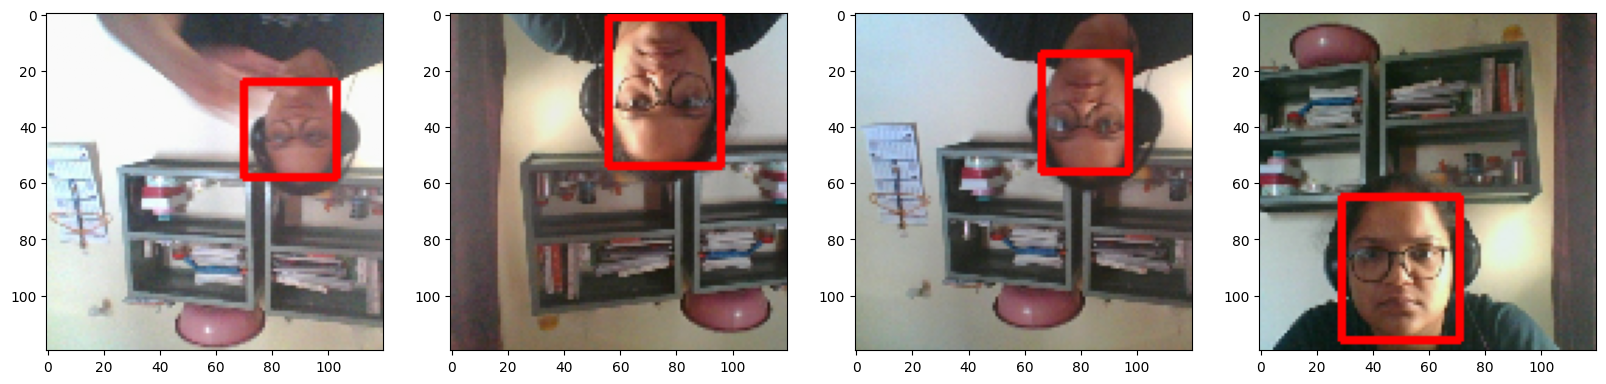

In [38]:
import cv2

# Create subplots
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

# Iterate over the images
for idx in range(4):
    # Get the sample image and coordinates
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]

    # Convert the sample_image to cv::UMat
    sample_image_cv = cv2.UMat(sample_image)

    # Draw rectangle on the image
    cv2.rectangle(
        sample_image_cv,
        tuple(np.multiply(sample_coords[:2], [120, 120]).astype(int)),
        tuple(np.multiply(sample_coords[2:], [120, 120]).astype(int)),
        (255, 0, 0),
        2,
    )

    # Convert the image back to NumPy array for display
    sample_image_with_rect = sample_image_cv.get()

    # Show the image with rectangle
    ax[idx].imshow(sample_image_with_rect)

# Show the plot
plt.show()


In [1]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx in range(4):
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]

    cv2.rectangle(
        sample_image,
        tuple(np.multiply(sample_coords[:2], [120, 120]).astype(int)),
        tuple(np.multiply(sample_coords[2:], [120, 120]).astype(int)),
        (255, 0, 0),
        2,
    )

    ax[idx].imshow(sample_image)

NameError: name 'plt' is not defined

In [39]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [40]:
vgg = VGG16(include_top=False)

In [41]:
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [43]:
facetracker = build_model()

In [44]:
X, y = train.as_numpy_iterator().next()

In [45]:
X.shape

(8, 120, 120, 3)

In [46]:
classes, coords = facetracker.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [47]:
classes, coords

(array([[0.43208265],
        [0.45786402],
        [0.308289  ],
        [0.40653828],
        [0.43689564],
        [0.43037605],
        [0.39041954],
        [0.3651919 ]], dtype=float32),
 array([[0.59027433, 0.5329546 , 0.52404165, 0.5715726 ],
        [0.61247563, 0.46113652, 0.5055615 , 0.584763  ],
        [0.63406414, 0.49227166, 0.61998504, 0.6111521 ],
        [0.6036651 , 0.5012734 , 0.5551857 , 0.58385694],
        [0.6424084 , 0.48486072, 0.52997506, 0.5858625 ],
        [0.6552807 , 0.46563157, 0.49336386, 0.61432385],
        [0.61437345, 0.6456425 , 0.51646686, 0.5531709 ],
        [0.62068367, 0.49890924, 0.5805969 , 0.61022675]], dtype=float32))

In [82]:
batches_per_epoch = len(train)
lr_decay = (1.0 / 0.75 - 1) / batches_per_epoch

In [49]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\optimizers\base_optimizer.py:34: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [64]:
def localization_loss(y_true, yhat):
    delta_coord = tf.reduce_sum(tf.square(y_true[:, :2] - yhat[:, :2]))

    h_true = y_true[:, 3] - y_true[:, 1]
    w_true = y_true[:, 2] - y_true[:, 0]

    h_pred = yhat[:, 3] - yhat[:, 1]
    w_pred = yhat[:, 2] - yhat[:, 0]

    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true - h_pred))

    return delta_coord + delta_size

In [99]:
def localization_loss(y_true, yhat):
    # Assuming y_true and yhat have shapes (batch_size, 4)
    delta_coord = tf.reduce_sum(tf.square(y_true - yhat), axis=1)
    return tf.reduce_mean(delta_coord)


In [100]:
print(y[0].shape)
print(classes.shape)


(8, 1)
(8, 1)


In [101]:
print(X.shape)
print(y.shape)


(8, 120, 120, 3)


AttributeError: 'tuple' object has no attribute 'shape'

In [102]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [103]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=0.30778736>

In [104]:
coords


array([[0.59027433, 0.5329546 , 0.52404165, 0.5715726 ],
       [0.61247563, 0.46113652, 0.5055615 , 0.584763  ],
       [0.63406414, 0.49227166, 0.61998504, 0.6111521 ],
       [0.6036651 , 0.5012734 , 0.5551857 , 0.58385694],
       [0.6424084 , 0.48486072, 0.52997506, 0.5858625 ],
       [0.6552807 , 0.46563157, 0.49336386, 0.61432385],
       [0.61437345, 0.6456425 , 0.51646686, 0.5531709 ],
       [0.62068367, 0.49890924, 0.5805969 , 0.61022675]], dtype=float32)

In [105]:
classloss(y[0], classes)
print(y[0])

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [106]:
regressloss(y[1], coords)


<tf.Tensor: shape=(), dtype=float32, numpy=0.30778736>

In [107]:
shape_of_coords = tuple(x.shape for x in coords)
print(shape_of_coords)
y[1].shape

((4,), (4,), (4,), (4,), (4,), (4,), (4,), (4,))


(8, 4)

In [92]:
def lloss(self, y_element, coord):
    # Assuming y_element and coord are tensors
    # Expand dimensions of y_element to match the shape of coord
    y_element_expanded = tf.expand_dims(y_element, axis=1)  # Add new axis to y_element
    # Calculate the loss
    loss = tf.reduce_mean(tf.square(y_element_expanded - coord))
    return loss


In [108]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [109]:
model = FaceTracker(facetracker)

In [110]:
model.compile(opt, classloss, regressloss)

In [111]:
logdir='logs'

In [112]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [113]:
y[0].shape
import numpy as np

# Assuming y[0] is a numpy array
rank = np.ndim(y[0])
print(rank)


2


In [114]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10


ValueError: Cannot take the length of shape with unknown rank.